In [62]:
#Importamos todos los paquetes que vamos a necesitar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

In [6]:
# cargamos nuestro dataset
modelo = pd.read_csv('modelo.csv')

ANALISIS MULTIVARIADO DE DATOS

In [68]:
# miramos el dataset y como aparece!
modelo.tail()

,banco,mes,year,ROA,SIZE,CAP,LOAN,DEP,PROV,resultado
891,Banco Azteca,diciembre,2018,0.031409,-0.006974,0.014571,0.019927,0.001924,-0.041961,bueno
892,Banco Azteca,enero,2019,-0.178337,-0.000276,-0.009848,0.024145,0.014615,-0.052837,malo
893,Banco Azteca,febrero,2019,-0.159987,-0.021146,-0.034811,0.019368,-0.001889,0.028049,malo
894,Banco Azteca,marzo,2019,0.188452,0.003334,0.001288,0.016775,-0.010945,-0.009681,bueno
895,Banco Azteca,abril,2019,-0.015154,0.003013,0.001286,0.014298,-0.001579,0.027559,malo


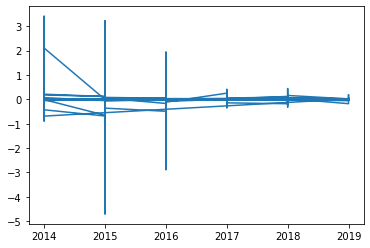

In [67]:
# haciendo grafica de lineas para ROA por años
modelo_nn = modelo.groupby(['year']).sum().reset_index()
plt.plot(modelo['year'], modelo['ROA'])
plt.show()

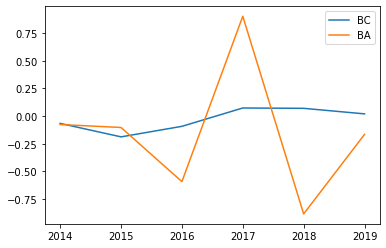

In [69]:
# haciendo grafica de lineas para gasto por edad para Mexico y España
modelo_nnn = modelo.groupby(['year', 'banco']).sum().reset_index()

# calculando datasets por pais
modelo_continental = modelo_nnn[modelo_nnn['banco'] == 'Banco Continental']
modelo_azteca = modelo_nnn[modelo_nnn['banco'] == 'Banco Azteca']

# haciendo la grafica
plt.plot(modelo_continental['year'], modelo_continental['ROA'], label='BC')
plt.plot(modelo_azteca['year'], modelo_azteca['ROA'], label='BA')
plt.legend()
plt.show()

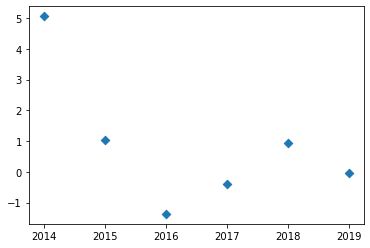

In [70]:
# haciendo grafica de lineas para gasto por edad con distintos markers
modelo_aa = modelo.groupby(['year']).sum().reset_index()
plt.scatter(modelo_aa['year'], modelo_aa['ROA'], marker='D')
plt.show()

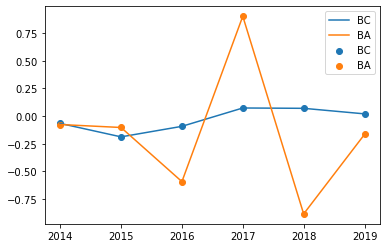

In [74]:
# haciendo grafica de lineas para gasto por edad para Mexico y España
modelo_nnn = modelo.groupby(['year', 'banco']).sum().reset_index()

# calculando datasets por pais
modelo_continental = modelo_nnn[modelo_nnn['banco'] == 'Banco Continental']
modelo_azteca = modelo_nnn[modelo_nnn['banco'] == 'Banco Azteca']

# haciendo la grafica
plt.scatter(modelo_continental['year'], modelo_continental['ROA'], label='BC')
plt.plot(modelo_continental['year'], modelo_continental['ROA'], label='BC')
plt.scatter(modelo_azteca['year'], modelo_azteca['ROA'], label='BA')
plt.plot(modelo_azteca['year'], modelo_azteca['ROA'], label='BA')
plt.legend()
plt.show()

In [8]:
# miramos ahora las tipologia de variables que tenemos
modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   banco   896 non-null    object 
 1   mes     896 non-null    object 
 2   year    896 non-null    int64  
 3   ROA     896 non-null    float64
 4   SIZE    896 non-null    float64
 5   CAP     896 non-null    float64
 6   LOAN    896 non-null    float64
 7   DEP     896 non-null    float64
 8   PROV    896 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 63.1+ KB


In [9]:
modelo.describe()

,year,ROA,SIZE,CAP,LOAN,DEP,PROV
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,2016.187500,0.005835,0.053404,0.001625,0.013197,0.001255,0.013057
std,1.550815,0.303685,1.464402,0.043819,0.249576,0.053563,0.253136
min,2014.000000,-4.706470,-0.978852,-0.356285,-0.788848,-0.467746,-0.785253
25%,2015.000000,-0.018518,-0.013516,-0.015015,-0.006514,-0.014379,-0.013070
50%,2016.000000,0.000061,0.004522,-0.003105,-0.000610,-0.000422,0.005525
75%,2017.250000,0.018151,0.022678,0.012755,0.003900,0.013716,0.021685
max,2019.000000,3.413390,43.577632,0.455854,6.197294,0.910059,6.093251


<AxesSubplot:xlabel='banco', ylabel='count'>

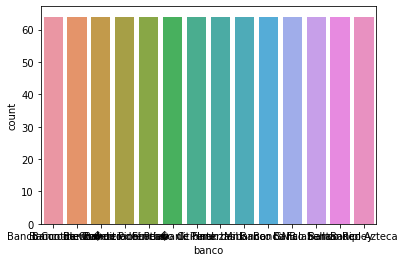

In [10]:
# empezamos con un grafico de barras de la proveniencia geografica
sns.countplot(x='banco', data=modelo)

<AxesSubplot:ylabel='CAP'>

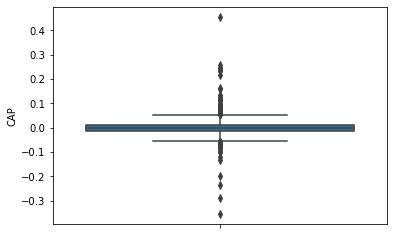

In [12]:
# ahora hacemos un boxplot de la variable success
sns.boxplot(y = 'CAP', data = modelo)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ROA', ylabel='Density'>

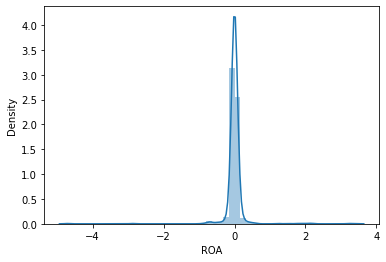

In [13]:
#seguimos con un histograma
sns.distplot(modelo['ROA'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ROA'>

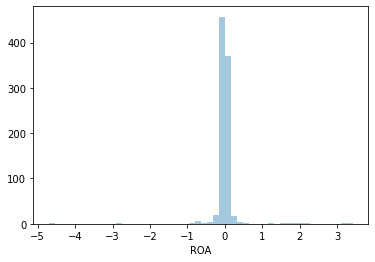

In [14]:
# y si quieremos ver frequencias en lugar de probabilidades
sns.distplot(modelo['ROA'], kde = False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ROA'>

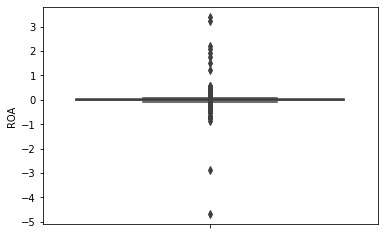

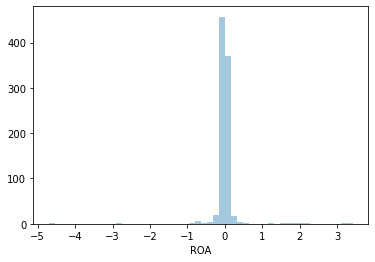

In [16]:
# por fin, miramos histograma y boxplot de alcohol
sns.boxplot(y = 'ROA', data = modelo)
plt.figure()
sns.distplot(modelo['ROA'], kde = False)

ANALISIS MULTIVARIADO

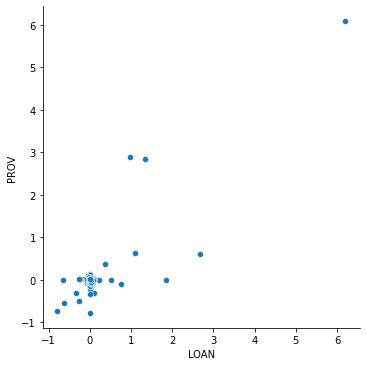

In [17]:
# Primero empezamos con el scatter plot
sns.relplot(x="LOAN", y="PROV", data=modelo)

<AxesSubplot:xlabel='LOAN', ylabel='PROV'>

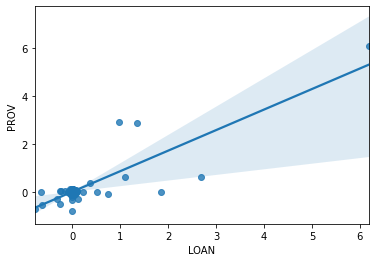

In [18]:
# ahora scatter plot mas linea, para identificar mejor las tendencias
sns.regplot(x="LOAN", y="PROV", data=modelo)

AxesSubplot(0.125,0.125;0.775x0.755)


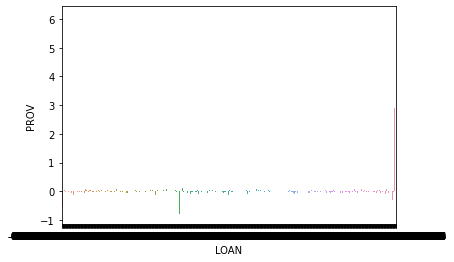

In [19]:
# ahora vamos con correlacion entre variable categorica y variable numerica!
print(sns.barplot(x="LOAN", y="PROV", data=modelo))

In [ ]:
# mismas variables, con el boxplot lo vemos con mas detalles
sns.boxplot(x="LOAN", y="PROV", data=modelo)

<AxesSubplot:>

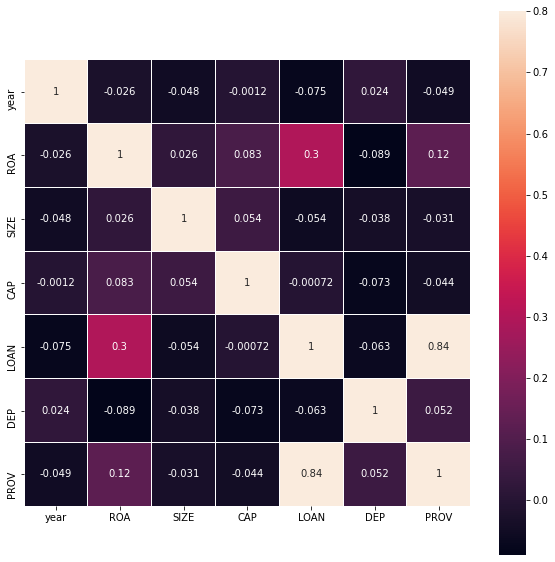

In [20]:
# y si queremos mirar todas las correlaciones?
corr = modelo.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True)

VISUALIZACIÓN DE DATOS

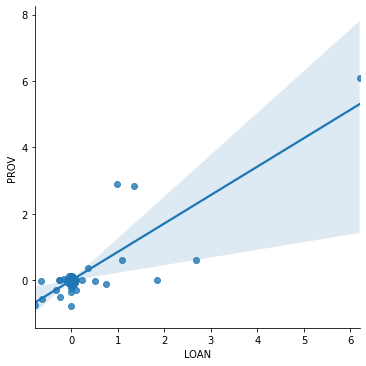

In [21]:
sns.lmplot(x="LOAN", y="PROV", data=modelo)

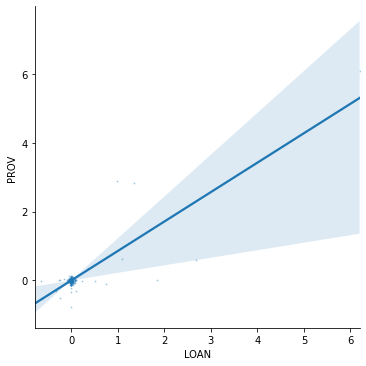

In [22]:
sns.lmplot(x="LOAN", y="PROV", data=modelo, truncate = True, scatter_kws={'s':0.8, 'alpha':0.3})

In [23]:
# Agrupando datos por genero y contando
df_modelo = modelo.groupby(['banco']).count()
df_modelo = df_modelo.rename(columns={"banco": "count"})
df_modelo

,mes,year,ROA,SIZE,CAP,LOAN,DEP,PROV
banco,,,,,,,,
Banco Azteca,64,64,64,64,64,64,64,64
Banco Continental,64,64,64,64,64,64,64,64
Banco Falabella,64,64,64,64,64,64,64,64
Banco GNB,64,64,64,64,64,64,64,64
Banco Interamericano de Finanzas,64,64,64,64,64,64,64,64
Banco Pichincha,64,64,64,64,64,64,64,64
Banco Ripley,64,64,64,64,64,64,64,64
Banco Santander,64,64,64,64,64,64,64,64
Banco de Comercio,64,64,64,64,64,64,64,64


In [25]:
# Agrupando datos por edad y contando
df_modelo_media = modelo.groupby(['banco']).mean()
df_modelo_media

,year,ROA,SIZE,CAP,LOAN,DEP,PROV
banco,,,,,,,
Banco Azteca,2016.1875,-0.014316,-0.018106,0.007632,0.016226,0.005880,0.043323
Banco Continental,2016.1875,-0.002825,0.005333,0.002718,-0.001512,0.000711,0.001991
Banco Falabella,2016.1875,0.037324,-0.001412,0.002549,0.040883,0.001310,0.019814
Banco GNB,2016.1875,0.001072,-0.004167,0.000247,0.008044,0.009478,-0.008529
Banco Interamericano de Finanzas,2016.1875,0.023581,0.006548,0.000209,-0.006844,0.001575,0.004293
Banco Pichincha,2016.1875,-0.013644,-0.008287,-0.000573,0.007091,0.000761,0.003428
Banco Ripley,2016.1875,0.027534,-0.002082,-0.000502,0.094814,-0.003171,0.088415
Banco Santander,2016.1875,0.003499,0.004624,0.000672,-0.013340,0.000671,-0.019961
Banco de Comercio,2016.1875,0.004379,-0.011606,-0.001498,0.010854,0.000655,0.001010


In [26]:
# seleccionar una columna opcion 1
modelo['banco']

0      Banco Continental
1      Banco Continental
2      Banco Continental
3      Banco Continental
4      Banco Continental
             ...        
891         Banco Azteca
892         Banco Azteca
893         Banco Azteca
894         Banco Azteca
895         Banco Azteca
Name: banco, Length: 896, dtype: object

In [30]:
# utilidad de seleccionar con listas
columnas_interes = ['banco', 'ROA', 'LOAN']
a_modelo = modelo[columnas_interes]
a_modelo

,banco,ROA,LOAN
0,Banco Continental,-0.013965,-0.003443
1,Banco Continental,-0.010738,-0.011496
2,Banco Continental,-0.001870,-0.002783
3,Banco Continental,-0.001295,-0.007343
4,Banco Continental,-0.001231,-0.009992
...,...,...,...
891,Banco Azteca,0.031409,0.019927
892,Banco Azteca,-0.178337,0.024145
893,Banco Azteca,-0.159987,0.019368
894,Banco Azteca,0.188452,0.016775


In [31]:
# eliminar una columna
a_modelo.drop(columns='LOAN')

,banco,ROA
0,Banco Continental,-0.013965
1,Banco Continental,-0.010738
2,Banco Continental,-0.001870
3,Banco Continental,-0.001295
4,Banco Continental,-0.001231
...,...,...
891,Banco Azteca,0.031409
892,Banco Azteca,-0.178337
893,Banco Azteca,-0.159987
894,Banco Azteca,0.188452


In [32]:
# filtrando para genero femenino
modelo[modelo['banco'] == 'Banco Azteca']

,banco,mes,year,ROA,SIZE,CAP,LOAN,DEP,PROV
832,Banco Azteca,enero,2014,0.006009,0.016803,0.007448,-0.000994,0.002317,-0.006500
833,Banco Azteca,febrero,2014,0.000925,0.001997,-0.009409,-0.003523,0.022637,-0.034983
834,Banco Azteca,marzo,2014,-0.017493,-0.006332,-0.002714,-0.003236,-0.000215,-0.042492
835,Banco Azteca,abril,2014,0.014981,0.020754,-0.002721,-0.002134,-0.027172,-0.055909
836,Banco Azteca,mayo,2014,-0.028129,-0.007268,-0.023874,0.000312,-0.045418,-0.024106
...,...,...,...,...,...,...,...,...,...
891,Banco Azteca,diciembre,2018,0.031409,-0.006974,0.014571,0.019927,0.001924,-0.041961
892,Banco Azteca,enero,2019,-0.178337,-0.000276,-0.009848,0.024145,0.014615,-0.052837
893,Banco Azteca,febrero,2019,-0.159987,-0.021146,-0.034811,0.019368,-0.001889,0.028049
894,Banco Azteca,marzo,2019,0.188452,0.003334,0.001288,0.016775,-0.010945,-0.009681


In [35]:
# filtrando para edades mayores a 30 (pero no iguales)
modelo[modelo['ROA']>0]

,banco,mes,year,ROA,SIZE,CAP,LOAN,DEP,PROV
5,Banco Continental,junio,2014,0.002347,-0.018064,0.002317,-0.001105,-0.008156,-0.051380
9,Banco Continental,octubre,2014,0.004392,-0.020032,0.116078,0.001696,0.024642,0.015292
15,Banco Continental,abril,2015,0.000159,0.022000,0.014126,0.005565,0.008543,0.018438
19,Banco Continental,agosto,2015,0.003986,-0.033971,0.053476,0.001337,0.035868,0.026369
28,Banco Continental,mayo,2016,0.000023,0.007456,-0.008639,-0.013183,-0.005382,0.028690
...,...,...,...,...,...,...,...,...,...
880,Banco Azteca,enero,2018,0.119514,-0.023174,-0.027068,0.018700,-0.001456,-0.071799
881,Banco Azteca,febrero,2018,0.008490,-0.031505,-0.018161,0.021172,-0.016671,0.037318
883,Banco Azteca,abril,2018,0.135293,-0.041957,-0.016834,0.022633,-0.007090,0.046494
891,Banco Azteca,diciembre,2018,0.031409,-0.006974,0.014571,0.019927,0.001924,-0.041961


In [39]:
# condiciones para filtrar
cond1 = modelo['banco'] == 'Banco Azteca'
cond2 = modelo['ROA']>0
# filtrar por varias condiciones con "y"
modelo[cond1 & cond2].count()

banco    29
mes      29
year     29
ROA      29
SIZE     29
CAP      29
LOAN     29
DEP      29
PROV     29
dtype: int64

In [42]:
# crear columnas condicionalmente
condiciones = [
    (modelo["ROA"]<0),
    (modelo["ROA"]>=0),
    (modelo["ROA"]>0.5),
]
opciones = ["malo", "bueno", "sobresaliente"]

# incluir condiciones y opciones
modelo["resultado"] = np.select(condiciones, opciones)
modelo

,banco,mes,year,ROA,SIZE,CAP,LOAN,DEP,PROV,resultado
0,Banco Continental,enero,2014,-0.013965,0.015743,-0.021277,-0.003443,-0.022750,0.024337,malo
1,Banco Continental,febrero,2014,-0.010738,-0.004098,0.000000,-0.011496,0.028613,0.016006,malo
2,Banco Continental,marzo,2014,-0.001870,0.014318,-0.006441,-0.002783,-0.008801,-0.006415,malo
3,Banco Continental,abril,2014,-0.001295,-0.009271,0.004052,-0.007343,0.021576,0.022557,malo
4,Banco Continental,mayo,2014,-0.001231,0.008980,0.045198,-0.009992,0.001249,0.012161,malo
...,...,...,...,...,...,...,...,...,...,...
891,Banco Azteca,diciembre,2018,0.031409,-0.006974,0.014571,0.019927,0.001924,-0.041961,bueno
892,Banco Azteca,enero,2019,-0.178337,-0.000276,-0.009848,0.024145,0.014615,-0.052837,malo
893,Banco Azteca,febrero,2019,-0.159987,-0.021146,-0.034811,0.019368,-0.001889,0.028049,malo
894,Banco Azteca,marzo,2019,0.188452,0.003334,0.001288,0.016775,-0.010945,-0.009681,bueno


In [43]:
# ordenar por edad de forma ascendente: de menor a mayor
modelo.sort_values(by=['ROA'])

,banco,mes,year,ROA,SIZE,CAP,LOAN,DEP,PROV,resultado
526,Mibanco,marzo,2015,-4.706470,-0.046821,0.003630,-0.012133,-0.037830,0.025934,malo
538,Mibanco,marzo,2016,-2.888350,-0.011277,-0.013166,0.011275,-0.003386,0.009503,malo
584,Banco GNB,septiembre,2014,-0.888929,-0.715496,-0.062542,-0.625752,0.254673,-0.550074,malo
525,Mibanco,febrero,2015,-0.752540,-0.014689,-0.006611,-0.014318,-0.012091,0.041063,malo
537,Mibanco,febrero,2016,-0.748545,0.022825,-0.007215,0.009683,0.005411,-0.002033,malo
...,...,...,...,...,...,...,...,...,...,...
539,Mibanco,abril,2016,1.939118,0.000434,-0.005458,0.012402,0.011205,0.012324,bueno
779,Banco Ripley,diciembre,2014,2.105235,-0.763261,0.074047,6.197294,-0.146720,6.093251,bueno
259,Banco Interamericano de Finanzas,abril,2014,2.192042,-0.188762,-0.004815,-0.252720,0.039804,-0.496982,bueno
406,Citibank,noviembre,2015,3.223670,-0.186931,0.093555,-0.003765,0.087892,-0.785253,bueno


In [44]:
# ordenar por edad de forma ascendente: de mayor a menor
modelo.sort_values(by=['ROA'], ascending=False)

,banco,mes,year,ROA,SIZE,CAP,LOAN,DEP,PROV,resultado
649,Banco Falabella,octubre,2014,3.413390,-0.416724,0.069454,2.676668,-0.182377,0.600604,bueno
406,Citibank,noviembre,2015,3.223670,-0.186931,0.093555,-0.003765,0.087892,-0.785253,bueno
259,Banco Interamericano de Finanzas,abril,2014,2.192042,-0.188762,-0.004815,-0.252720,0.039804,-0.496982,bueno
779,Banco Ripley,diciembre,2014,2.105235,-0.763261,0.074047,6.197294,-0.146720,6.093251,bueno
539,Mibanco,abril,2016,1.939118,0.000434,-0.005458,0.012402,0.011205,0.012324,bueno
...,...,...,...,...,...,...,...,...,...,...
537,Mibanco,febrero,2016,-0.748545,0.022825,-0.007215,0.009683,0.005411,-0.002033,malo
525,Mibanco,febrero,2015,-0.752540,-0.014689,-0.006611,-0.014318,-0.012091,0.041063,malo
584,Banco GNB,septiembre,2014,-0.888929,-0.715496,-0.062542,-0.625752,0.254673,-0.550074,malo
538,Mibanco,marzo,2016,-2.888350,-0.011277,-0.013166,0.011275,-0.003386,0.009503,malo


In [45]:
# ordenar por pais y gasto ambos de forma ascendente: de mayor a menor
modelo.sort_values(by=['banco', 'ROA'])

,banco,mes,year,ROA,SIZE,CAP,LOAN,DEP,PROV,resultado
844,Banco Azteca,enero,2015,-0.653347,-0.551481,-0.084546,0.975728,0.600085,2.889514,malo
890,Banco Azteca,noviembre,2018,-0.317992,-0.014085,-0.005383,0.024185,-0.005276,0.043354,malo
860,Banco Azteca,mayo,2016,-0.290593,-0.016448,0.027180,-0.014217,0.001093,0.036265,malo
861,Banco Azteca,junio,2016,-0.235187,-0.016329,0.013881,-0.013339,0.000432,0.047253,malo
888,Banco Azteca,septiembre,2018,-0.231162,-0.017249,0.002884,0.022546,-0.010058,-0.013040,malo
...,...,...,...,...,...,...,...,...,...,...
339,Scotiabank Peru,agosto,2015,0.025701,0.017214,0.043277,-0.000343,0.013610,0.005374,bueno
332,Scotiabank Peru,enero,2015,0.027182,0.031492,0.068858,0.010921,-0.019892,-0.015649,bueno
336,Scotiabank Peru,mayo,2015,0.027366,0.021289,-0.008264,0.006702,0.009379,-0.028682,bueno
335,Scotiabank Peru,abril,2015,0.067803,-0.016898,-0.005975,0.004650,0.003564,-0.034012,bueno


In [46]:
# buscar venta con máximo de gasto
modelo[modelo['ROA'] == modelo['ROA'].max()]

,banco,mes,year,ROA,SIZE,CAP,LOAN,DEP,PROV,resultado
649,Banco Falabella,octubre,2014,3.41339,-0.416724,0.069454,2.676668,-0.182377,0.600604,bueno


In [51]:
# calcular suma de gastos el día lunes
modelo_2015 = modelo[modelo['year']==2015]
modelo_2015['ROA'].mean()

0.006168750086546518

In [56]:
# agrupar por pais y genero, luego calcular la mediana
modelo.groupby([modelo['banco']=='Scotiabank Peru', 'year']).mean()

ROA      SIZE       CAP      LOAN       DEP      PROV
banco year                                                            
False 2014  0.023023  0.270755 -0.000304  0.073326  0.001021  0.049285
      2015  0.006201  0.011300  0.000753  0.005100  0.000200  0.015248
      2016 -0.008211  0.008318  0.002720 -0.003133  0.001331  0.001889
      2017 -0.002911 -0.000642  0.009281 -0.001785 -0.001223  0.003455
      2018  0.005984  0.001160 -0.003722  0.001740  0.006080  0.006348
      2019 -0.001418  0.004065 -0.000246 -0.000597  0.001893 -0.003203
True  2014  0.122545  0.148920 -0.001410  0.007243 -0.010015 -0.020703
      2015  0.005754  0.019258  0.005091 -0.002020 -0.007162  0.003424
      2016 -0.007368  0.008055  0.003449  0.001829  0.002556  0.007235
      2017  0.004714  0.003359  0.001144  0.002605  0.002159  0.000574
      2018  0.001014  0.005446  0.002991  0.000420  0.002700  0.005027
      2019  0.006245  0.009738 -0.007035 -0.001079 -0.003120  0.006940

In [61]:
# agrupar por pais y genero, luego calcular la mediana
modelo.groupby(['banco', 'year']).mean()

ROA      SIZE       CAP      LOAN       DEP  \
banco           year                                                     
Banco Azteca    2014 -0.006320  0.012763 -0.001512 -0.003396  0.003637   
                2015 -0.008550 -0.041861  0.009287  0.071592  0.050073   
                2016 -0.049309 -0.018841  0.029593 -0.016458 -0.002086   
                2017  0.075215 -0.029697  0.014045  0.007528 -0.012422   
                2018 -0.073633 -0.017670 -0.007199  0.021055 -0.007861   
...                        ...       ...       ...       ...       ...   
Scotiabank Peru 2015  0.005754  0.019258  0.005091 -0.002020 -0.007162   
                2016 -0.007368  0.008055  0.003449  0.001829  0.002556   
                2017  0.004714  0.003359  0.001144  0.002605  0.002159   
                2018  0.001014  0.005446  0.002991  0.000420  0.002700   
                2019  0.006245  0.009738 -0.007035 -0.001079 -0.003120   

                          PROV  
banco           year            
Banco Azteca    2014 -0.017530  
                2015  0.275711  
                2016  0.008153  
                2017 -0.039483  
                2018  0.004783  
...                        ...  
Scotiabank Peru 2015  0.003424  
                2016  0.007235  
                2017  0.000574  
                2018  0.005027  
                2019  0.006940  

[84 rows x 6 columns]